## ICE-9 Spatial Filters
Please note that all the tasks and questions are extensions of the course's PPTs

## Task 1. Gaussian filters
Given the Gaussian mask creation formula: h(x,y) = exp(- (x.^2+y.^2) / (2*sigma^2)). Please create 3 by 3, 5 by 5, and 7 by 7 Gaussian masks and display the masks' matrices (assume sigma = 1). Apply these Gaussian filters to one image separately, and display the outputs. (DO NOT use any of the existing implementations for Gaussian  masks creation)

In [7]:
#write you code here

import numpy as np

def gaussian2D(shape=(3,3),sigma=1):
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

## 3x3 Gaussian Mask

In [9]:
gaussian = gaussian2D((3,3),1)
gaussian

array([[0.07511361, 0.1238414 , 0.07511361],
       [0.1238414 , 0.20417996, 0.1238414 ],
       [0.07511361, 0.1238414 , 0.07511361]])

## 5x5 Gaussian Mask

In [10]:
gaussian_5 = gaussian2D((5,5),1)
gaussian_5

array([[0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.02193823, 0.09832033, 0.16210282, 0.09832033, 0.02193823],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902]])

## 7x7 Gaussian Mask

In [11]:
gaussian_7 = gaussian2D((7,7),1)
gaussian_7

array([[1.96519161e-05, 2.39409349e-04, 1.07295826e-03, 1.76900911e-03,
        1.07295826e-03, 2.39409349e-04, 1.96519161e-05],
       [2.39409349e-04, 2.91660295e-03, 1.30713076e-02, 2.15509428e-02,
        1.30713076e-02, 2.91660295e-03, 2.39409349e-04],
       [1.07295826e-03, 1.30713076e-02, 5.85815363e-02, 9.65846250e-02,
        5.85815363e-02, 1.30713076e-02, 1.07295826e-03],
       [1.76900911e-03, 2.15509428e-02, 9.65846250e-02, 1.59241126e-01,
        9.65846250e-02, 2.15509428e-02, 1.76900911e-03],
       [1.07295826e-03, 1.30713076e-02, 5.85815363e-02, 9.65846250e-02,
        5.85815363e-02, 1.30713076e-02, 1.07295826e-03],
       [2.39409349e-04, 2.91660295e-03, 1.30713076e-02, 2.15509428e-02,
        1.30713076e-02, 2.91660295e-03, 2.39409349e-04],
       [1.96519161e-05, 2.39409349e-04, 1.07295826e-03, 1.76900911e-03,
        1.07295826e-03, 2.39409349e-04, 1.96519161e-05]])

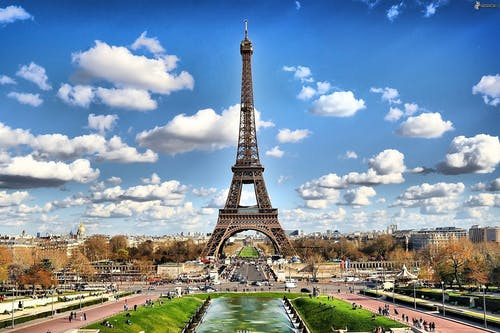

In [3]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('Eiffel Tower.jpeg')
cv2_imshow(img)
cv2.waitKey()
cv2.imwrite('Eiffel Tower.jpeg', img)
cv2.destroyAllWindows()

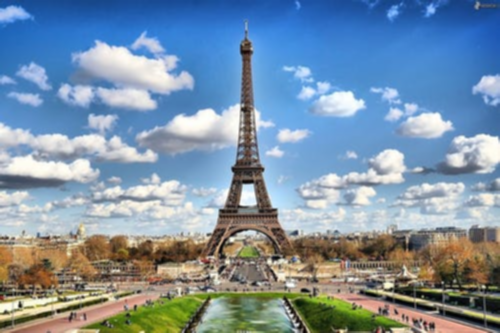

In [18]:
img_3 = cv2.filter2D(src=img, ddepth=-1, kernel=gaussian)
cv2_imshow(image_3)
cv2.waitKey()
cv2.imwrite('Eiffel Tower.jpeg', image_3)
cv2.destroyAllWindows()

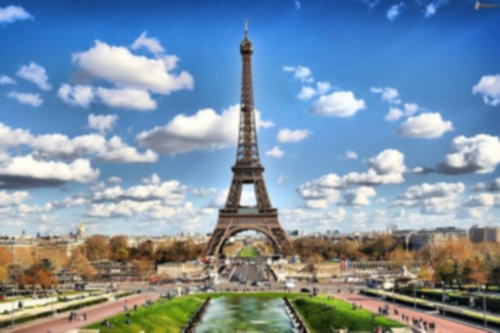

In [19]:
img_5 = cv2.filter2D(src=img, ddepth=-1, kernel=gaussian_5)
cv2_imshow(image_5)
cv2.waitKey()
cv2.imwrite('Eiffel Tower.jpeg', image_5)
cv2.destroyAllWindows()

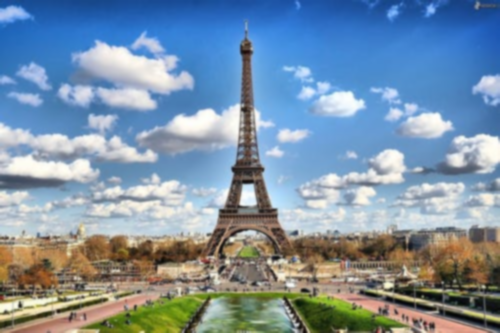

In [20]:
img_7 = cv2.filter2D(src=img, ddepth=-1, kernel=gaussian_7)
cv2_imshow(image_7)
cv2.waitKey()
cv2.imwrite('Eiffel Tower.jpeg', image_7)
cv2.destroyAllWindows()

## Question 1. According to the filters you have learnt, which is the best one to remove the salt and pepper noise? Explain it.

**Answer to Q1**: Noise and detail are removed using Gaussian filtering. It's not very good at getting rid of salt and pepper noise. Smoothing is effective with larger and larger filters. Larger filters provide a higher degree of filtering, resulting in more noise reduction.

> Indented block




---

## Task 2. Sharpening Filters
2.1 We know a sharp image can be obtained by by subtracting a smoothed (i.e low-passed) image from the original image. Please get a sharp image with the 7 by 7 Gaussian smoothing filter you built in task 1 and display the output.

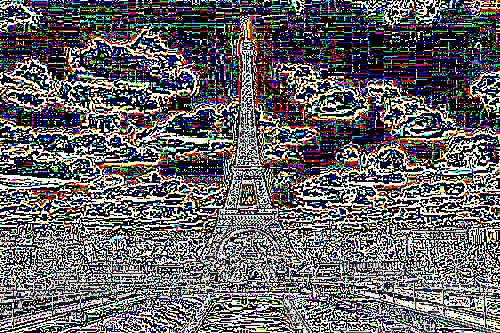

In [21]:
#write you code here

sharpen_img = img - image_7
cv2_imshow(sharpen_img)
cv2.waitKey()
cv2.imwrite('Eiffel Tower.jpeg', sharpen_img)
cv2.destroyAllWindows()

2.2 Using the sharp image produced in task 2.1, please apply the unsharp masking and high boost filtering (k = 3) separately, and display the sharpening results.

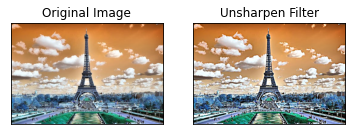

In [22]:
from PIL import Image, ImageFilter
from matplotlib import pyplot as plt

image = Image.fromarray(img.astype('uint8'))
new_image = image.filter(ImageFilter.UnsharpMask(radius=3, percent=100))
plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(new_image, cmap = 'gray')
plt.title('Unsharpen Filter'), plt.xticks([]), plt.yticks([])
plt.show()

## Question 2.1 Please give an example of 3 by 3 unsharp masking filter.
For instance, an example of sobel mask filter is: [[-1, -2, -1],[0, 0, 0],[1, 2, 1]].



**Answer to Q2.1**: # unsharp masking 3x3 (-1 / 16.0) * np.array([[1, 2, 1],
                                  [2, -28, 2],
                                  [1, 2, 1]])


In [ ]:
kernel1 = -(1 / 16.0) * np.array([[1, 2, 1], [2, -28, 2], [1, 2, 1]])

## Question 2.2 Explain the difference between sharpening filter (high-pass) and unsharp masking filter
Given a 3 by 3 sharpening filter as [[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]].




**Answer to Q2.2**: A fuzzy (un - sharp) version of the image is combined with the original in the un - sharp filter to create a sharper image. High-pass filters let data on approximately through while blocking low info. It results in center gray areas, lighter and darker areas at the high-frequency boundaries of a copied layer. The crispness of the original is imparted by changing photoshop blending mode of this layer to Overlay or Gentle Light. The light side is lightened and the dark side is darkened in the un - sharp mask, increasing the contrast along the edges.

> Indented block



---